In [1]:
# Import standard libraries
import os
import re
import numpy as np
import pandas as pd
from collections import Counter

# Import visualization libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colormaps
import seaborn as sns

# Uncomment below if pandas and openpyxl are not installed
# !pip install pandas openpyxl

# You can uncomment these imports if needed
# from numpy import stack
# from sympy import li

In [3]:
organ_mapping = {
    'cervical': 'Cervix',
    'head and neck ': 'Head and Neck',
    'oropharynx': 'Oropharynx',
    'colon': 'Intestine',
    'colon\\n\\n\\n': 'Intestines',
    'colon\n\n\n\n': 'Intestines',
    'colon\n\n\n': 'Intestines',
    'colorectal': 'Intestines',
    'colorectal ': 'Intestines',
    'colon  ': 'Intestines',
    'brain': 'Human Brain',
    'brain ': 'Human Brain',
    'human brain': 'Human Brain',
    'cerebral': 'Human Brain',
    'monkey brain': 'Monkey Brain',
    'breast': 'Breast',
    'liver': 'Liver',
    'lung': 'Lung',
    'prostate': 'Prostate',
    'pancreas': 'Pancreas',
    'kidney': 'Kidney',
    'renal': 'Kidney',
    'hepatic vein': 'Liver',
    'hepatic': 'Liver',
    'head': 'Head and Neck',
    'neck': 'Head and Neck',
    'head and neck': 'Head and Neck',
    'h&n': 'Head and Neck',
    'abdomen': 'Stomach',
    'stomach': 'Stomach',
    'chest': 'Chest',
    'eye': 'Eye',
    'gallbladder': 'Gallbladder',
    'heart': 'Heart',
    'cardiac': 'Heart',
    'bladder': 'Bladder',
    'lymp nodes': 'Lymph Node',
    'lymp node': 'Lymph Node',
    'lymph node': 'Lymph Node',
    'pelvic region': 'Pelvic Region',
    'pelvic': 'Pelvic Region',
    'pelvis': 'Pelvic Region',
    'skin': 'Skin',
    'spleen': 'Spleen',
    'swine liver': 'Swine Liver',
    'thyroid': 'Thyroid',
    'whole body': 'Whole Body',
    'femoral head': 'Pelvic Region',
    'thorax': 'Chest',
    'rectum': 'Intestine',
    'colorectum': 'Intestine',
    'cervix': 'Cervix',
    'small intestine': 'Intestine',
    'pituitary gland': 'Pituitary Gland',
    'stroma': 'Stroma',
    'tissue': 'Tissue',
    'arterial': 'Blood Vessel',
    'blood vessels': 'Blood Vessel',
    'No Organ Mentioned': 'Organ unspecified',
    'no organ mentioned': 'Organ unspecified',
}

In [5]:
def save_plot_to_folder(fig, filename, base_dir="05MICCAI_notebook_data_visualization"):
    """
    Saves a matplotlib figure to a specified directory with the given filename.
    
    Parameters:
        fig (matplotlib.figure.Figure): The figure object to save.
        filename (str): The name of the file to save the plot as.
        base_dir (str): The base directory where the plot will be saved.
    """
    # Ensure the base directory exists
    full_path = os.path.join(base_dir, filename)
    os.makedirs(os.path.dirname(full_path), exist_ok=True)
    
    # Save the figure
    fig.savefig(full_path, dpi=300, bbox_inches='tight', transparent=True)
    print(f"Plot saved to {full_path}")

In [23]:
def analyze_organ_distribution_extensive_use_demographics(df, organ_column, dataset_column, save_path_base, organ_mapping=organ_mapping):
    """Analyzes and plots the distribution of organs where extensive demographic data is provided."""

    # Expand and explode the organ categories
    df[organ_column] = df[organ_column].str.split(', ')
    df_expanded = df.explode(organ_column)
  
    df_expanded[organ_column] = df_expanded[organ_column].map(organ_mapping).fillna(df_expanded[organ_column])

    # Filter the data for dataset quantity == 1
    dataset_quantity = df_expanded[df_expanded[dataset_column] == 1]

    # Group by organ and count occurrences
    grouped_extensive_demo = dataset_quantity.groupby(organ_column).size().reset_index(name='Count')
    grouped_extensive_demo_sorted = grouped_extensive_demo.sort_values('Count', ascending=False)
    #grouped_extensive_demo_sorted['Percentage'] = grouped_extensive_demo_sorted['Count'] / grouped_extensive_demo_sorted['Count'].sum() * 100

    # Plotting the details for 'Extensive Demographic Data' with horizontal bars
    colors = plt.cm.Set3_r.colors
    plt.figure(figsize=(10, 4))
    
    #plt.barh(grouped_extensive_demo_sorted[organ_column], grouped_extensive_demo_sorted['Percentage'], color=colors,edgecolor='black', linewidth=0.5, alpha=0.8, height=0.8)
    plt.barh(grouped_extensive_demo_sorted[organ_column], grouped_extensive_demo_sorted['Count'], color=colors,edgecolor='black', linewidth=0.5, alpha=0.8, height=0.8)

    #plt.xlabel('Percentage of Articles (%)', fontsize=10, labelpad=10, loc='right', style='italic')
    plt.xlabel('Number of Articles', fontsize=9.5, labelpad=10, loc='right', style='italic')
    plt.ylabel('Individual Organs', fontsize=9.5, labelpad=10, loc='center', style='italic')
    
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    #plt.xticks(range(0, int(3) + 1, 1))

    plt.grid(axis='x', linestyle='--', which='both', color='gray', alpha=0.5)
    
    #plt.savefig(f'{save_path_base}_extensive_use_of_demographic_data.png', dpi=300, bbox_inches='tight', transparent=True)
    save_plot_to_folder(plt, f'{save_path_base}_dataset.png') # Save the plot to the plots folder
    plt.tight_layout()
    plt.show()

In [24]:
df = pd.read_csv('/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/project_submission/00_project/notebooks/05MICCAI_notebook_preprocessed_annotation_data.csv')

Index(['title', 'paper name', 'vol',
       'Does the article contain any of these keywords: cancer/tumor/tumour?',
       'Study subject labelled as ‘patient/patients’ in dataset(s)', 'age',
       'sex/gender', 'ethnicity', 'geographical location ', 'dataset quantity',
       'quantity of public datasets', 'quantity of private datasets',
       'image type in datasets', 'organ/body part in datasets',
       'Does the dataset contain sex-specific organ(s)?',
       'Female and/or male organs?', 'location ',
       'location as a healthcare facility', 'name of healthcare facility',
       'location as other (center/department/laboratory/university/institution/online)',
       'name of location as other (center/department/laboratory/university/institution/online)',
       'location as large-scale geographical entity',
       'name of location as large-scale geographical entity',
       'location as subnational geographical entity',
       'name of location as subnational geographical en

Plot saved to 05MICCAI_notebook_data_visualization/05MICCAI_notebook_data_visualization_dataset.png


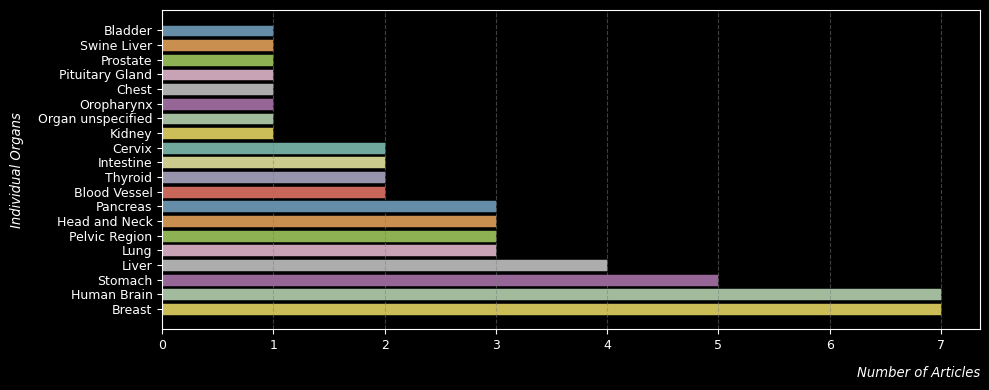

In [25]:
analyze_organ_distribution_extensive_use_demographics(df, 'organ/body part in datasets', 'dataset quantity', '05MICCAI_notebook_data_visualization')

In [30]:
df['dataset quantity'].unique()

array([1, 3, 2, 4, 6, 5, 7, 0])

In [1]:
def analyze_organ_distribution_extensive_use_demographics(df, organ_column, dataset_column, save_path_base, organ_mapping=organ_mapping):
    """Analyzes and plots the distribution of organs where extensive demographic data is provided."""

    # Expand and explode the organ categories
    df[organ_column] = df[organ_column].str.split(', ')
    df_expanded = df.explode(organ_column)
  
    df_expanded[organ_column] = df_expanded[organ_column].map(organ_mapping).fillna(df_expanded[organ_column])

    # Filter the data for dataset quantity == 1
    dataset_quantity = df_expanded[df_expanded[dataset_column] > 2]
    print(len(dataset_quantity))

    # Group by organ and count occurrences
    grouped_extensive_demo = dataset_quantity.groupby(organ_column).size().reset_index(name='Count')
    grouped_extensive_demo_sorted = grouped_extensive_demo.sort_values('Count', ascending=False)
    #grouped_extensive_demo_sorted['Percentage'] = grouped_extensive_demo_sorted['Count'] / grouped_extensive_demo_sorted['Count'].sum() * 100

    # Plotting the details for 'Extensive Demographic Data' with horizontal bars
    colors = plt.cm.Set3_r.colors
    plt.figure(figsize=(10, 4))
    
    #plt.barh(grouped_extensive_demo_sorted[organ_column], grouped_extensive_demo_sorted['Percentage'], color=colors,edgecolor='black', linewidth=0.5, alpha=0.8, height=0.8)
    plt.barh(grouped_extensive_demo_sorted[organ_column], grouped_extensive_demo_sorted['Count'], color=colors,edgecolor='black', linewidth=0.5, alpha=0.8, height=0.8)

    #plt.xlabel('Percentage of Articles (%)', fontsize=10, labelpad=10, loc='right', style='italic')
    plt.xlabel('Number of Articles', fontsize=9.5, labelpad=10, loc='right', style='italic')
    plt.ylabel('Individual Organs', fontsize=9.5, labelpad=10, loc='center', style='italic')
    
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    #plt.xticks(range(0, int(3) + 1, 1))

    plt.grid(axis='x', linestyle='--', which='both', color='gray', alpha=0.5)
    
    #plt.savefig(f'{save_path_base}_extensive_use_of_demographic_data.png', dpi=300, bbox_inches='tight', transparent=True)
    save_plot_to_folder(plt, f'{save_path_base}_dataset.png') # Save the plot to the plots folder
    plt.tight_layout()
    plt.show()

NameError: name 'organ_mapping' is not defined

30
Plot saved to 05MICCAI_notebook_data_visualization/05MICCAI_notebook_data_visualization_dataset.png


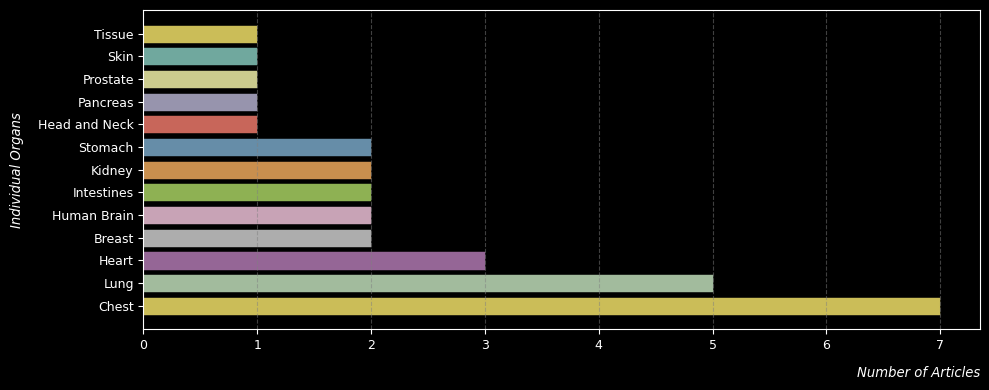

In [54]:
df = pd.read_csv('/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/project_submission/00_project/notebooks/05MICCAI_notebook_preprocessed_annotation_data.csv')
analyze_organ_distribution_extensive_use_demographics(df, 'organ/body part in datasets', 'dataset quantity', '05MICCAI_notebook_data_visualization')

In [56]:
df = pd.read_csv('/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/project_submission/00_project/notebooks/05MICCAI_notebook_preprocessed_annotation_data.csv')
def analyze_organ_distribution_extensive_use_demographics(df, organ_column, dataset_column, save_path_base, organ_mapping=organ_mapping):
    """Analyzes and plots the distribution of organs where extensive demographic data is provided."""

    # Expand and explode the organ categories
    df[organ_column] = df[organ_column].str.split(', ')
    df_expanded = df.explode(organ_column)
  
    df_expanded[organ_column] = df_expanded[organ_column].map(organ_mapping).fillna(df_expanded[organ_column])

    # Filter the data for dataset quantity == 1
    dataset_quantity = df_expanded[df_expanded[dataset_column] <= 2]
    print(len(dataset_quantity))

    # Group by organ and count occurrences
    grouped_extensive_demo = dataset_quantity.groupby(organ_column).size().reset_index(name='Count')
    grouped_extensive_demo_sorted = grouped_extensive_demo.sort_values('Count', ascending=False)
    #grouped_extensive_demo_sorted['Percentage'] = grouped_extensive_demo_sorted['Count'] / grouped_extensive_demo_sorted['Count'].sum() * 100

    # Plotting the details for 'Extensive Demographic Data' with horizontal bars
    colors = plt.cm.Set3_r.colors
    plt.figure(figsize=(10, 4))
    
    #plt.barh(grouped_extensive_demo_sorted[organ_column], grouped_extensive_demo_sorted['Percentage'], color=colors,edgecolor='black', linewidth=0.5, alpha=0.8, height=0.8)
    plt.barh(grouped_extensive_demo_sorted[organ_column], grouped_extensive_demo_sorted['Count'], color=colors,edgecolor='black', linewidth=0.5, alpha=0.8, height=0.8)

    #plt.xlabel('Percentage of Articles (%)', fontsize=10, labelpad=10, loc='right', style='italic')
    plt.xlabel('Number of Articles', fontsize=9.5, labelpad=10, loc='right', style='italic')
    plt.ylabel('Individual Organs', fontsize=9.5, labelpad=10, loc='center', style='italic')
    
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    #plt.xticks(range(0, int(3) + 1, 1))

    plt.grid(axis='x', linestyle='--', which='both', color='gray', alpha=0.5)
    
    #plt.savefig(f'{save_path_base}_extensive_use_of_demographic_data.png', dpi=300, bbox_inches='tight', transparent=True)
    save_plot_to_folder(plt, f'{save_path_base}_dataset.png') # Save the plot to the plots folder
    plt.tight_layout()
    plt.show()

132
Plot saved to 05MICCAI_notebook_data_visualization/05MICCAI_notebook_data_visualization_dataset.png


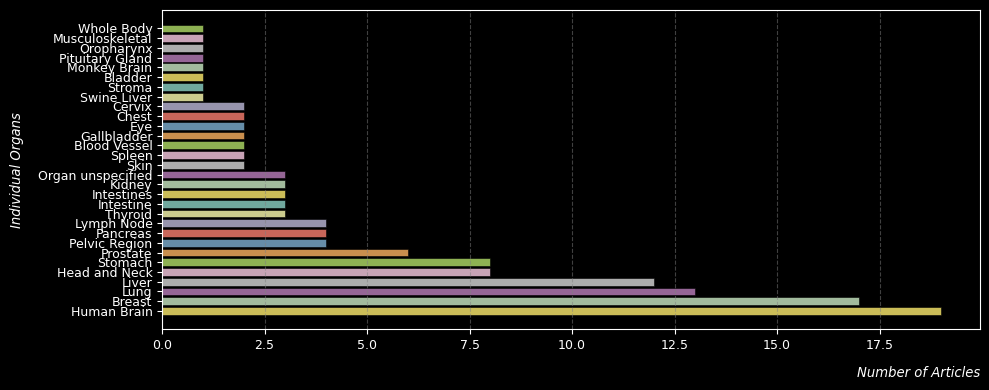

In [57]:
analyze_organ_distribution_extensive_use_demographics(df, 'organ/body part in datasets', 'dataset quantity', '05MICCAI_notebook_data_visualization')